<a href="https://colab.research.google.com/github/raz0208/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PRODIGY_DS_03

### Decision Tree Classifier for Customer Purchase Prediction

This project focuses on developing a Decision Tree Classifier to predict whether a customer is likely to purchase a product or service using demographic and behavioral data. The dataset employed is derived from the Bank Marketing Dataset available at the UCI Machine Learning Repository. This initiative is a component of Task 3 of my internship with Prodigy InfoTech.








In [52]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Ignore the warnings may shown

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
# Read dataset from source (indicating the file is separated by semicolons)
data = pd.read_csv("bank-additional.csv",delimiter=';')

# Change the name of column "y" to "deposit" for better claritication
data.rename(columns={'y':'deposit'}, inplace=True)

# Illustrate first rows of the dataset
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [55]:
# A summary of dataset: structure of the dataset, check for missing values, and understand the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [56]:
# Check the last rows of the DataFrame
data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4109,63,retired,married,high.school,no,no,no,cellular,oct,wed,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.740,5017.5,no
4110,53,housemaid,divorced,basic.6y,unknown,unknown,unknown,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4111,30,technician,married,university.degree,no,no,yes,cellular,jun,fri,...,1,999,1,failure,-1.7,94.055,-39.8,0.748,4991.6,no
4112,31,technician,single,professional.course,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4113,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [57]:
# Show the dimensions of the DataFrame, the number of rows and columns.
data.shape

(4119, 21)

In [58]:
# Show a list of columns name in dataframe
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [59]:
# Show the type of each column data in dataframe
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [60]:
# Count the number of each datatype.
data.dtypes.value_counts()

,count
object,11
int64,5
float64,5


In [61]:
# Check for duplicated data in dataset.
data.duplicated().sum()

0

In [62]:
# Check for nan_values in dataset.
data.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


As we can see, there is no column which contains nan_values.

In [63]:
# Separate the categorical and numerical columns from the DataFrame df based on their data types.

# Seperate categorical columns
cat_cols = data.select_dtypes(include='object').columns
print(cat_cols)

# Seperate numerical columns
num_cols = data.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [64]:
# Get a summary of dataset
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [65]:
# Generates descriptive statistics for all columns with data type object (typically categorical variables).
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


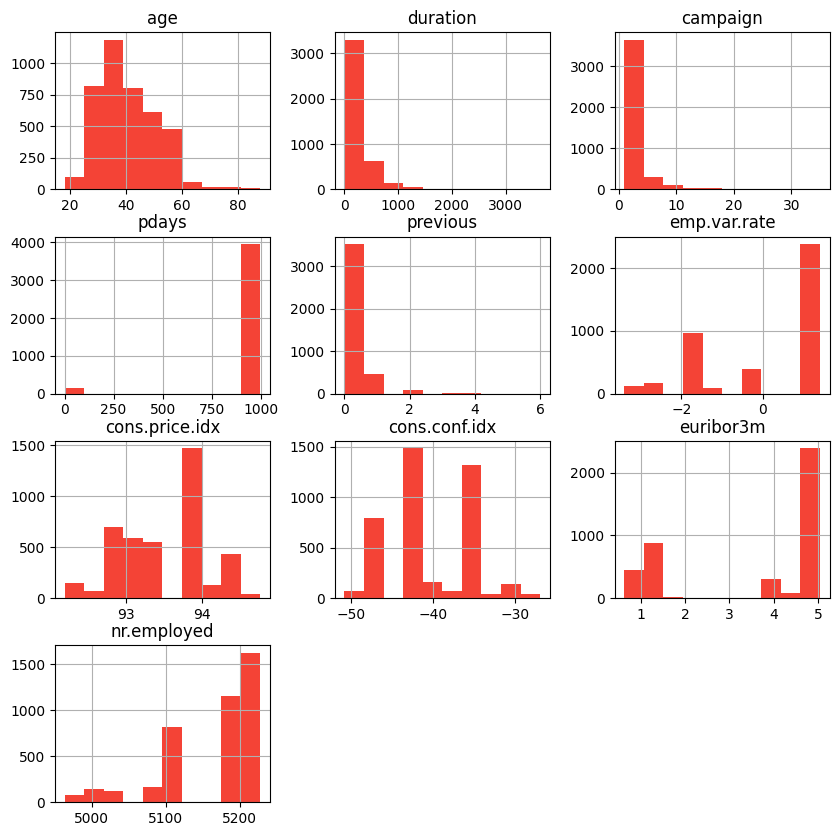

In [66]:
# Create histograms for all numerical columns in the DataFrame
data.hist(figsize=(10,10),color='#f44336')
plt.show()

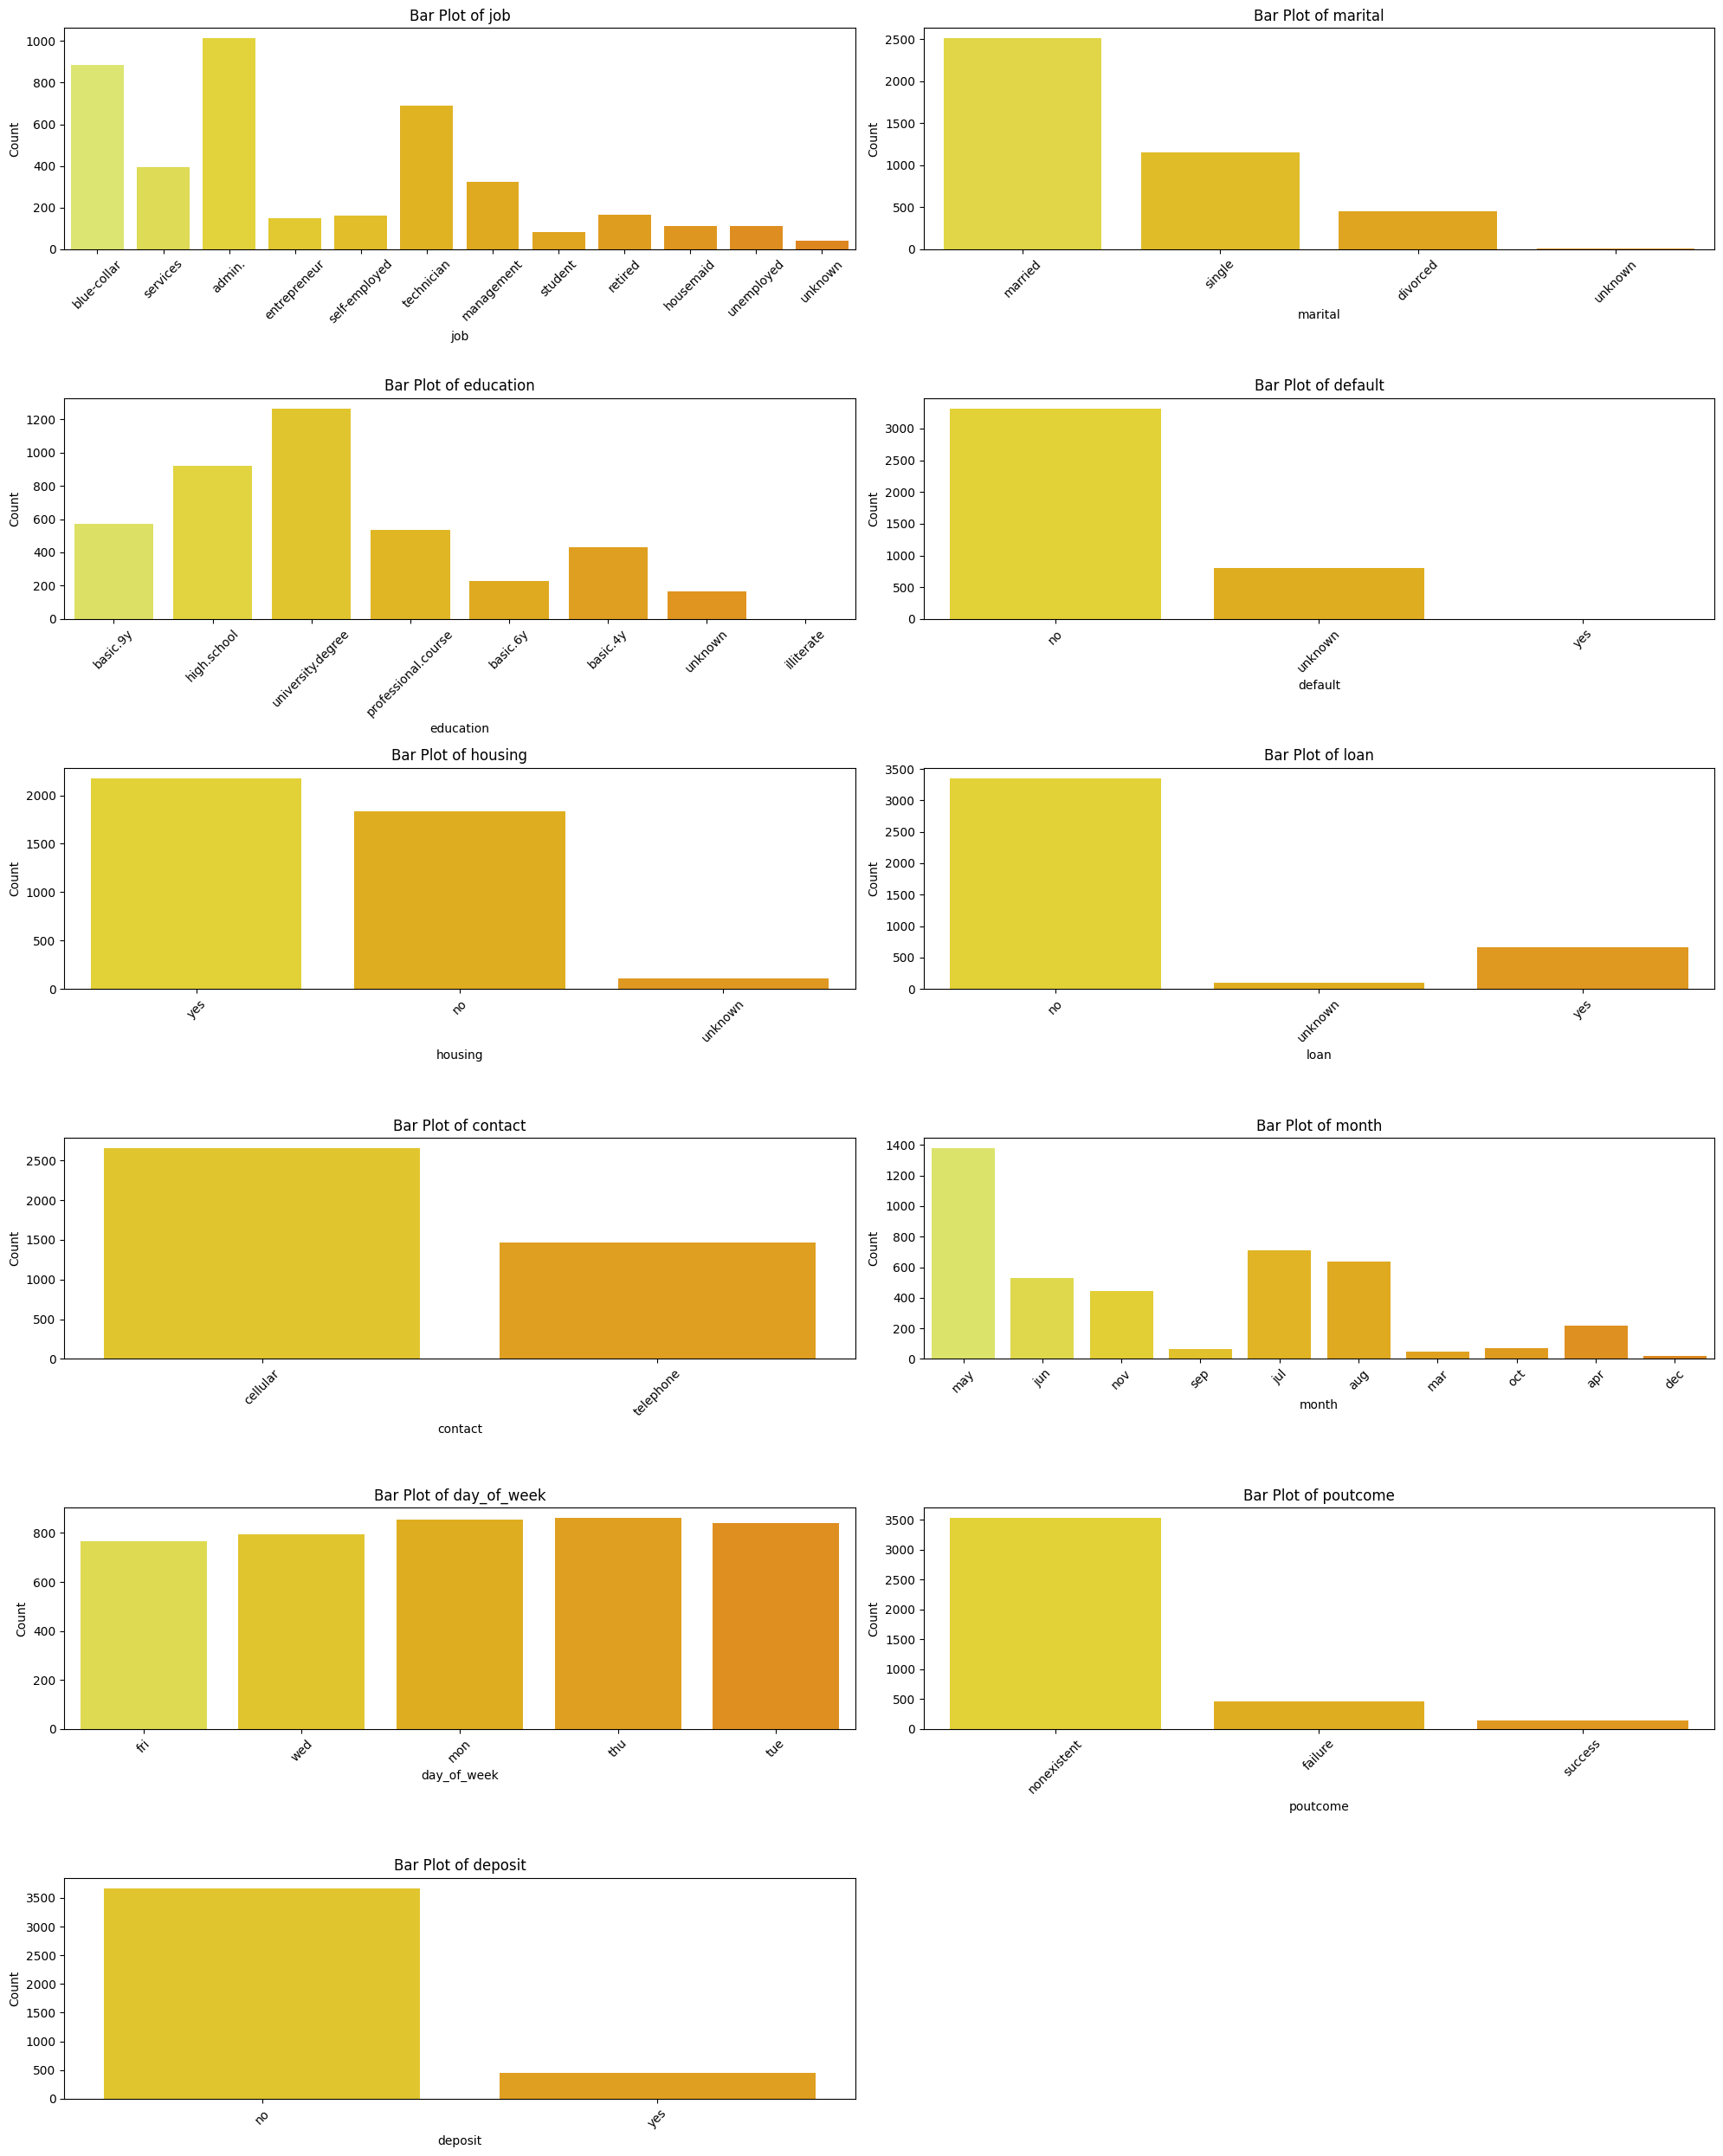

In [67]:
# Calculate the number of rows and columns for subplots
num_plots = len(cat_cols)
num_rows = (num_plots + 1) // 2
num_cols = 2

# Create a new figure
plt.figure(figsize=(20, 25))

# Loop through each feature and create a countplot
for i, feature in enumerate(cat_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=feature, data=data, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

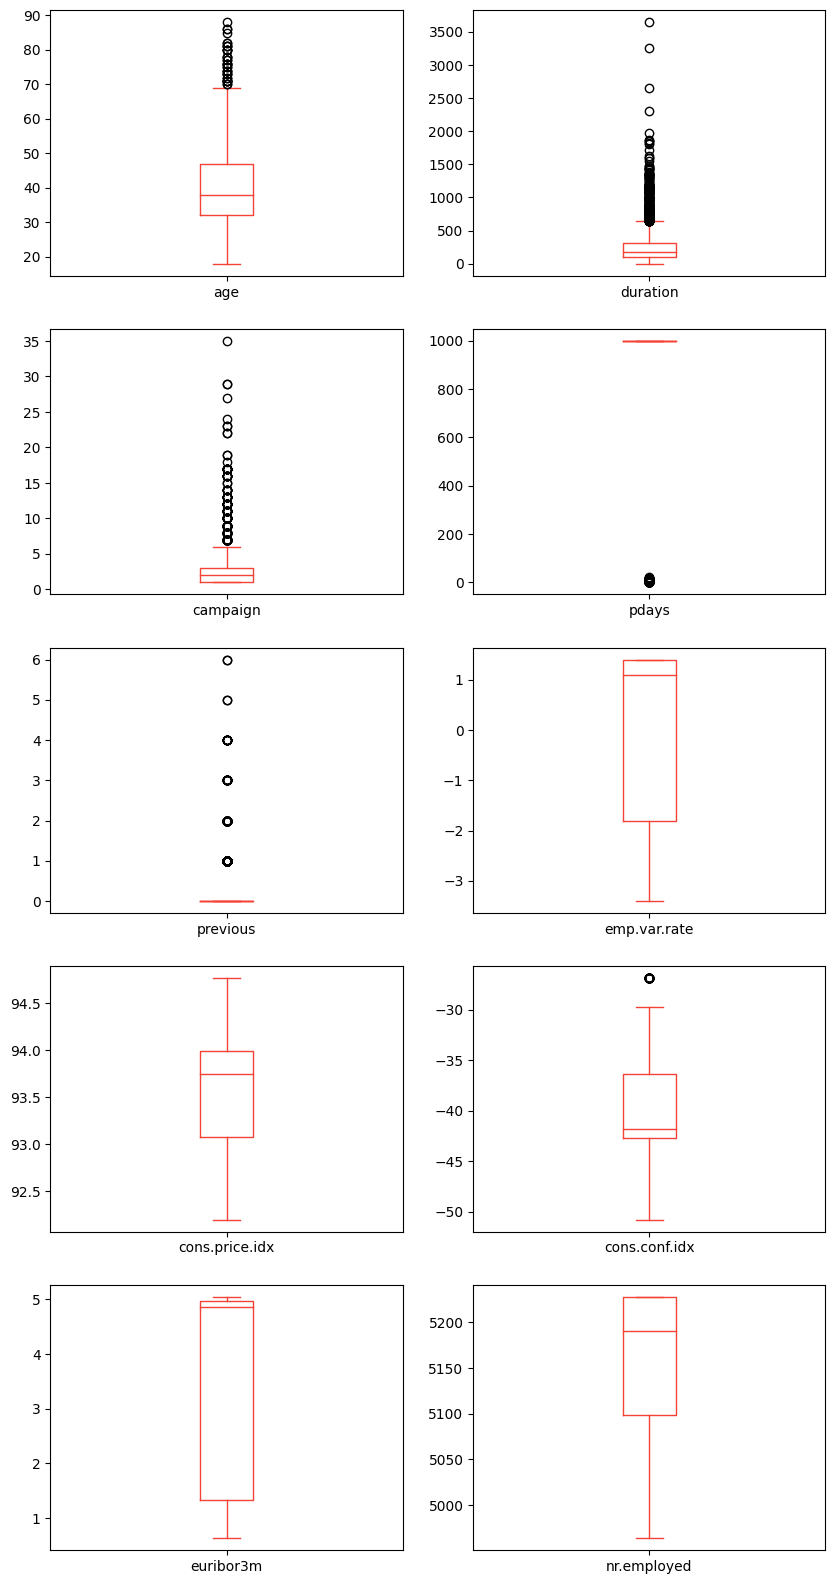

In [68]:
# Create box pot for categorical variables
data.plot(kind='box', subplots=True, layout=(5,2),figsize=(10,20),color='#f44336')
plt.show()

In [69]:
# Filter outliers using the interquartile range (IQR) method

df = data
# Select the relevant columns
columns = ['age', 'campaign', 'duration']
for col in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)

    # Calculate the Interquartile Range (IQR)
    iqr = q3 - q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter out outliers
    df[col] = df[col].where((df[col] > lower_bound) & (df[col] < upper_bound))

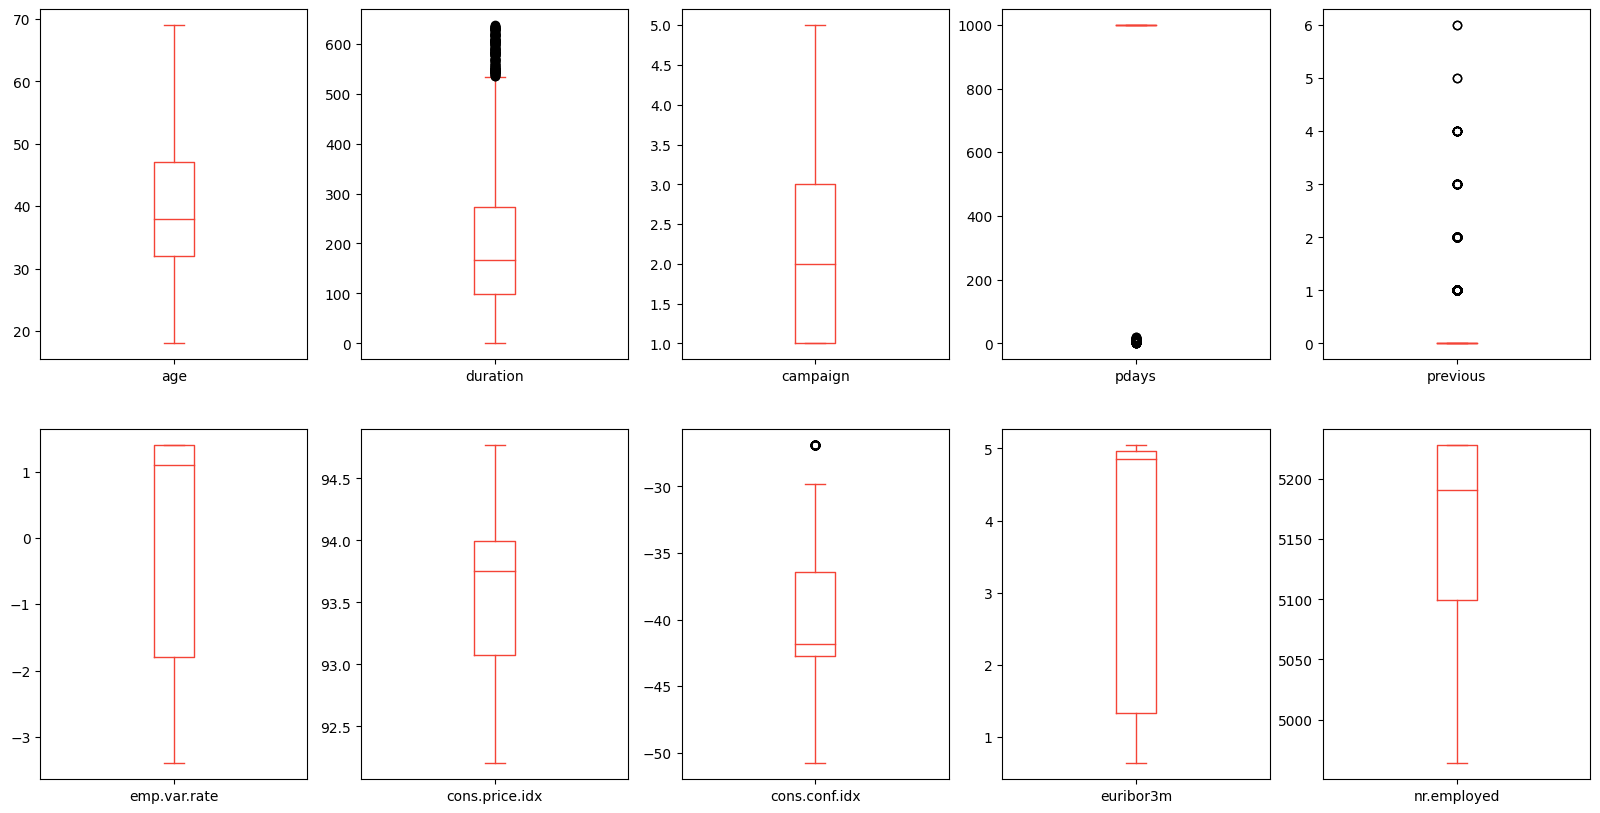

In [71]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#f44336')
plt.show()

This part removes outliers in the 'age', 'campaign', and 'duration' columns


                     age  duration  campaign     pdays  previous  \
age             1.000000  0.015768  0.009590 -0.004544  0.003248   
duration        0.015768  1.000000 -0.056510 -0.068298  0.064981   
campaign        0.009590 -0.056510  1.000000  0.045584 -0.066993   
pdays          -0.004544 -0.068298  0.045584  1.000000 -0.587941   
previous        0.003248  0.064981 -0.066993 -0.587941  1.000000   
emp.var.rate    0.031497 -0.060465  0.109225  0.270684 -0.415238   
cons.price.idx  0.015600  0.000449  0.092988  0.058472 -0.164922   
cons.conf.idx   0.080883 -0.030869 -0.015610 -0.092090 -0.051420   
euribor3m       0.041180 -0.073615  0.093136  0.301478 -0.458851   
nr.employed     0.027887 -0.089585  0.094727  0.381983 -0.514853   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                 0.031497        0.015600       0.080883   0.041180   
duration           -0.060465        0.000449      -0.030869  -0.073615   
campaign            0.109225 

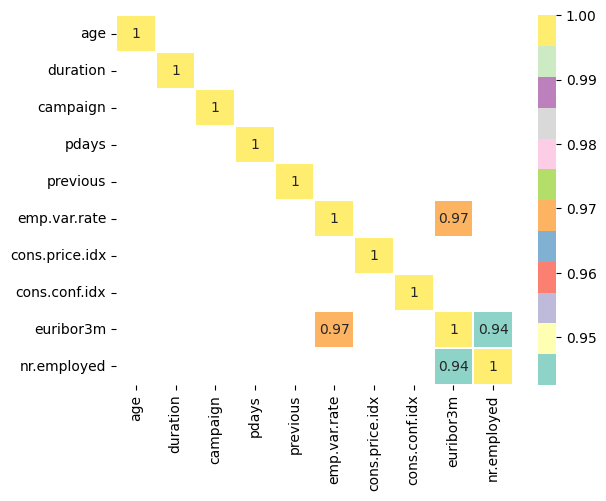

In [75]:
# Compute the correlation matrix for the numeric columns

# Exclude non-numeric columns
numeric_df = df.drop(columns=cat_cols)

# Compute the correlation matrix
corr = numeric_df.corr()

# Print the correlation matrix
print(corr)

# Filter correlations with absolute value >= 0.90
corr = corr[abs(corr) >= 0.90]

sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [76]:
# Create a list of columns with high corrolation
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [77]:
# Create a copy of dataframe to protect original data from changes
dfCopy = df.copy()
dfCopy.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [78]:
# Drop columns with high correlation from a DataFrame
dfCopy.drop(high_corr_cols,inplace=True,axis=1)
dfCopy.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [79]:
dfCopy.shape

(4119, 18)

In [80]:
# Import required library
from sklearn.preprocessing import LabelEncoder

# Using LableEncoder method to convert categorical variables in the DataFrame "dfCopy" into numerical format.
lb = LabelEncoder()
df_encoded = dfCopy.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,510,0,20,0,1,13,17,0


In [81]:
# Count the number of occurrences of each unique value in the "deposit" column of the "df_encoded" DataFrame
df_encoded['deposit'].value_counts()

,count
deposit,
0,3668
1,451


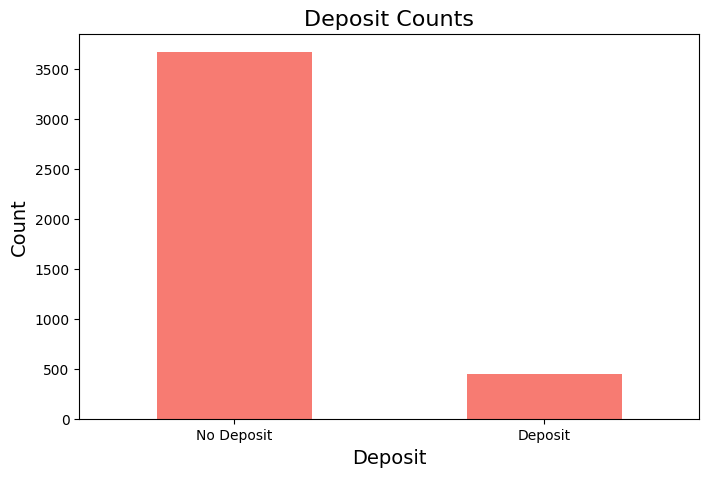

In [83]:
deposit_counts = df_encoded['deposit'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
deposit_counts.plot(kind='bar', color='#f44336', alpha=0.7)

# Add titles and labels
plt.title('Deposit Counts', fontsize=16)
plt.xlabel('Deposit', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Deposit', 'Deposit'], rotation=0)  # Set custom labels

# Show the plot
plt.show()

## Model implementation part

In [87]:
# Import required library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import plot_tree

In [ ]:
# Seperate independent and dependent variabes
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


In [88]:
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)

In [89]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [90]:
mscore(dt)

Training Score 0.9177727419876983
Testing Score 0.9087378640776699


In [91]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 1 ... 0 0 0]


In [92]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.9087378640776699
Confusion Matrix
 [[913  17]
 [ 77  23]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       930
           1       0.57      0.23      0.33       100

    accuracy                           0.91      1030
   macro avg       0.75      0.61      0.64      1030
weighted avg       0.89      0.91      0.89      1030



In [93]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


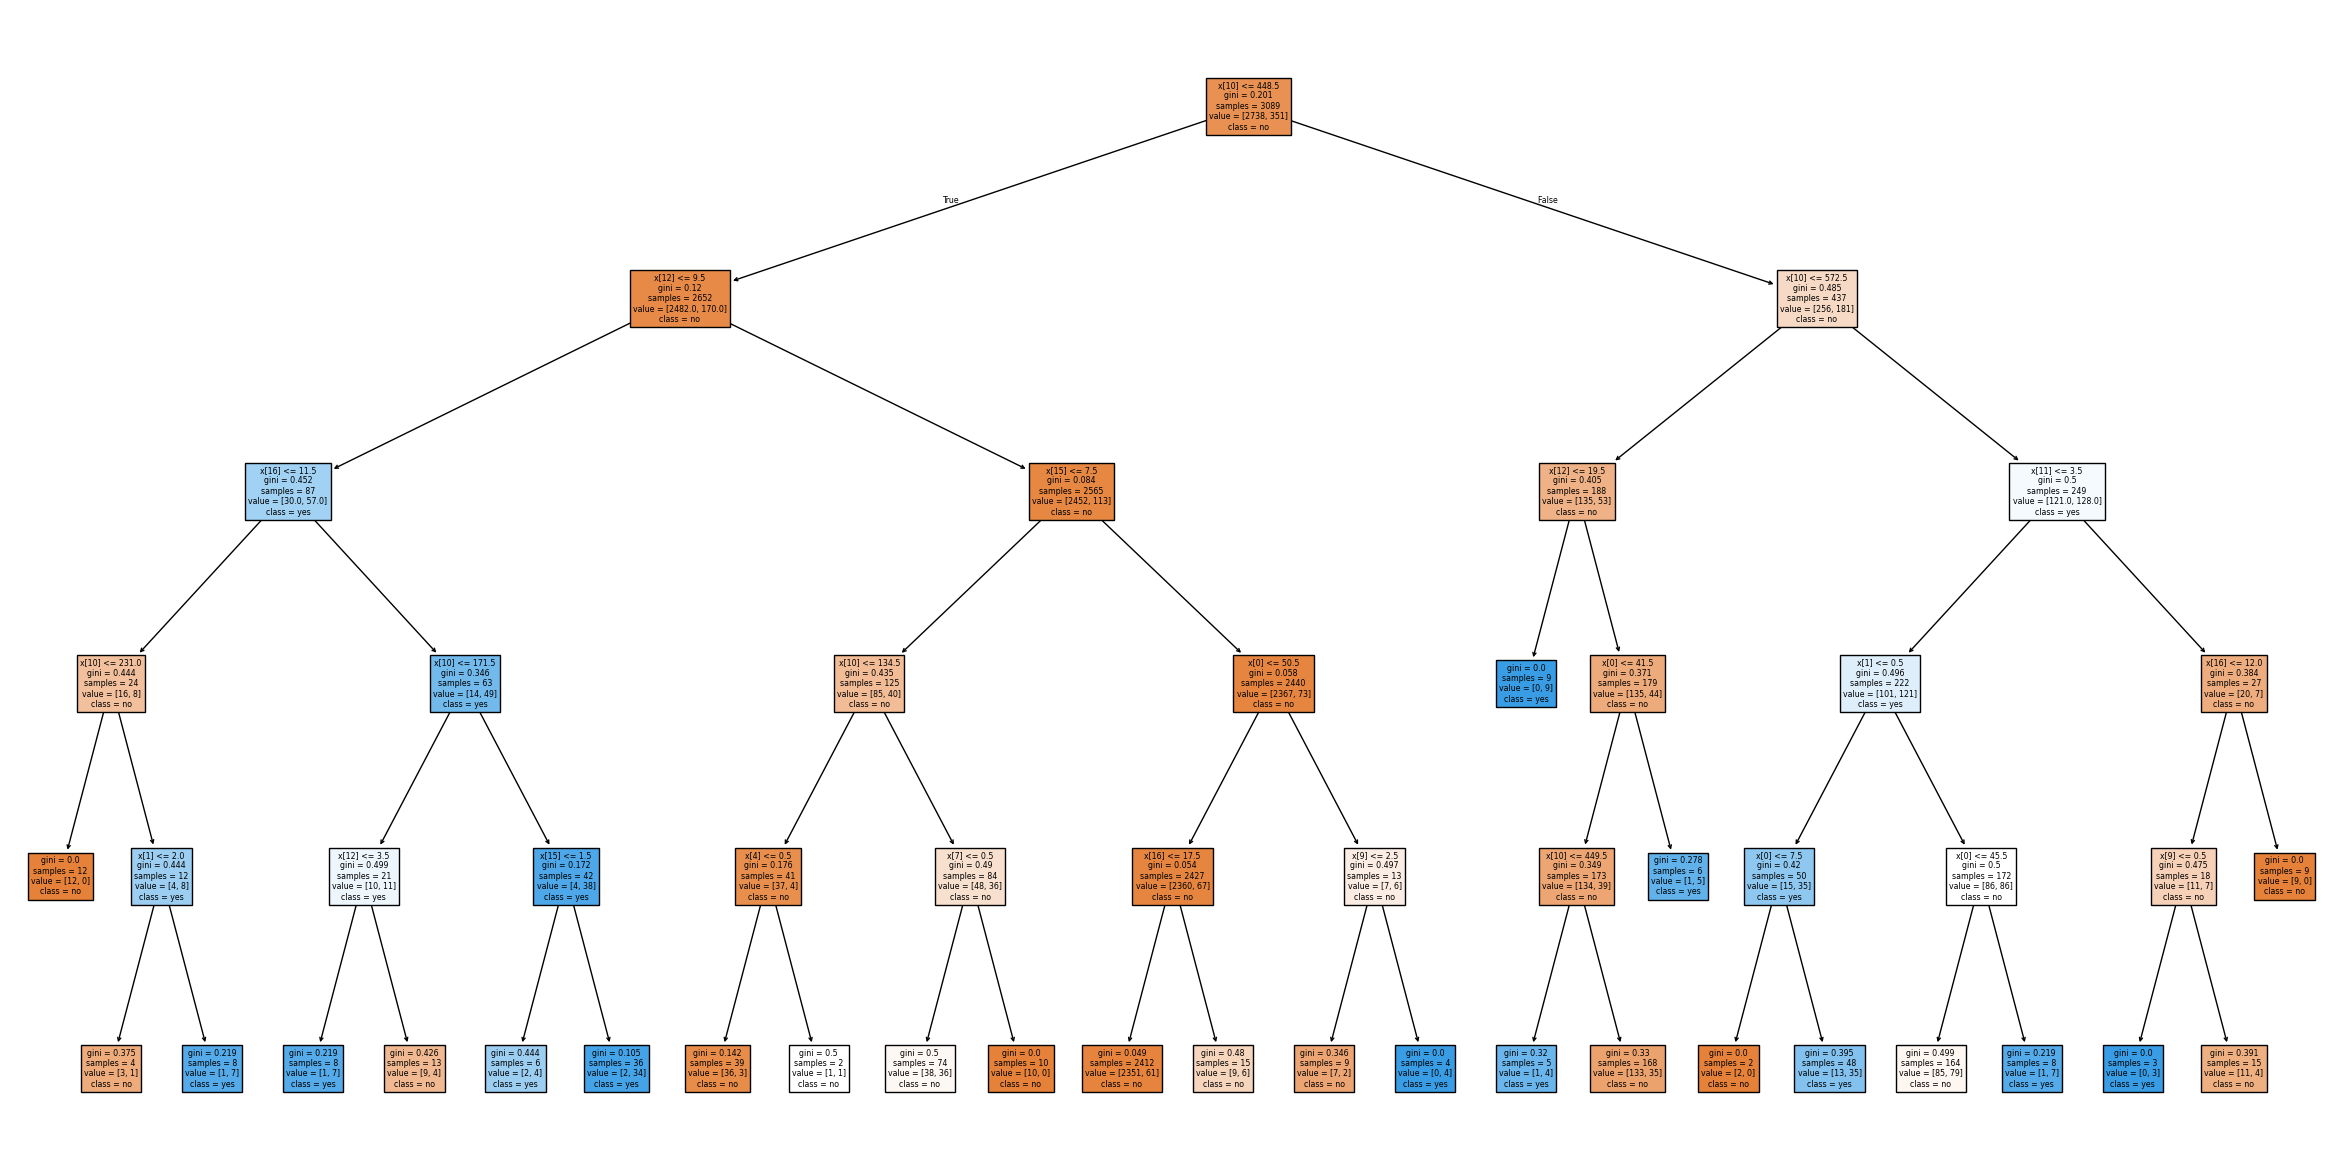

In [95]:
plt.figure(figsize=(30,15))
plot_tree(dt,class_names=cn,filled=True)
plt.show()